# Settings
## Import modules

In [1]:
import os
import natsort
import librosa, librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
# file = './MeaningOfYou_drums(MIDI)_cut.wav'
file = './MeaningOfYou_drums(HPSS)_cut.wav'

### Initialize & Checking Folders (Path)

In [2]:
# Audio Data (Source)
audio_list_path = './audio_list'
audio_list = natsort.natsorted(os.listdir(audio_list_path))
print(f"Audio_list : {audio_list}")

# Results 
result_path = './result'
result = natsort.natsorted(os.listdir(result_path))
print(f"Result : {result}")

Audio_list : ['MeaningOfYou_drums(HPSS)_cut.wav', 'MeaningOfYou_drums(MIDI)_cut.wav']
Result : []


## Defining three methods 
### 1. Extract only percussive sound(drum) from audio samples

In [3]:
# showing audio samples
audio_list = natsort.natsorted(os.listdir(audio_list_path))
print(f"Let's extract percussive sound from {audio_list}")

Let's extract percussive sound from ['MeaningOfYou_drums(HPSS)_cut.wav', 'MeaningOfYou_drums(MIDI)_cut.wav']


In [4]:
# audio_data --> percussive_data 
def percussive_audio_data(audio_file, save_file):
    # loading .wav file 
    y, sr = librosa.load(audio_file, sr=44100, duration=10)
    print(f"sample rate (sr) : {sr}")
    
    # Future Work (현재는 드럼 소리만 있는 데이터)
    # # harmonic percussive source seperation
    # harmonic, percussive = librosa.decompose.hpss(librosa.stft(y))
    # # saving only percussive source
    # y = librosa.istft(percussive)
    # #######################################
    # y = ((y-min(y))/(max(y)-min(y)))*1.4-0.7
    # #######################################
    
    # showing the waveform (of the percussive source only)
    plt.figure(figsize=(12,4))
    librosa.display.waveshow(y, alpha=0.5, sr=sr)
    plt.xlabel("Time (s)")
    plt.ylabel("Aplitude")
    plt.title(f"{save_file}")
    
    # saving new file (only percussive sound)
    sf.write(save_file + '.wav', y, sr)
    print(f"'{save_file}'.wav extracted from '{audio_file}'\n")
    

./result\MeaningOfYou_drums(HPSS)_cut folder created.
sample rate (sr) : 44100
'./result\MeaningOfYou_drums(HPSS)_cut/MeaningOfYou_drums(HPSS)_cut_p'.wav extracted from './audio_list/MeaningOfYou_drums(HPSS)_cut.wav'

./result\MeaningOfYou_drums(MIDI)_cut folder created.
sample rate (sr) : 44100
'./result\MeaningOfYou_drums(MIDI)_cut/MeaningOfYou_drums(MIDI)_cut_p'.wav extracted from './audio_list/MeaningOfYou_drums(MIDI)_cut.wav'

##################################################################
Extracted complete ['MeaningOfYou_drums(HPSS)_cut_p.wav', 'MeaningOfYou_drums(MIDI)_cut_p.wav']


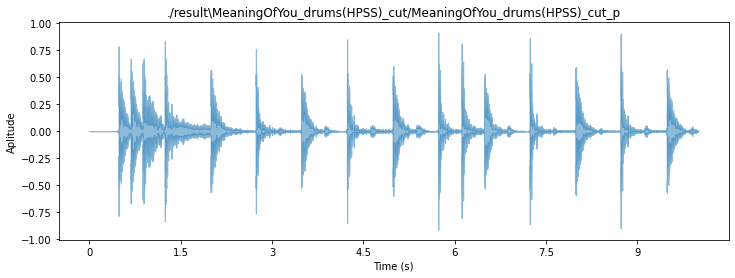

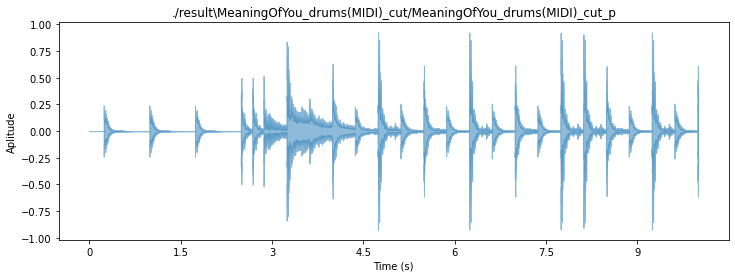

In [5]:
percussive_list = list()
# extracting only percussive sound from .wav file 
for audio in audio_list:
    # setting audio_path in a result directory
    audio_path = os.path.join(result_path, audio[:-4])
    percussive_list.append(audio[:-4] + '_p.wav')
    
    # Generating audio directory in a result directory
    try:
        os.makedirs(audio_path)
        print(f"{audio_path} folder created.")
    except:
        print("You already have folders")
    
    if audio.find('wav') != -1:
        # Setting source path & save path 
        audio_file = audio_list_path + '/' + audio
        percussive_file = audio_path + '/' + audio[:-4] + '_p'
        percussive_audio_data(audio_file, percussive_file)     

print("##################################################################")
print(f"Extracted complete {percussive_list}")

### 2. Trim percussive sound one by one

In [6]:
# checking percussive_list
print("Let's split percussive sound by using Onset Detection.")
print(percussive_list)

Let's split percussive sound by using Onset Detection.
['MeaningOfYou_drums(HPSS)_cut_p.wav', 'MeaningOfYou_drums(MIDI)_cut_p.wav']


In [7]:
# percussive_data --> trim_data 
def trim_percussive_data(percussive_file, save_file, path):
    # loading .wav file
    
#     y, sr = librosa.load(percussive_file)
#     y, sr = librosa.load(percussive_file, sr=44100)
#     # onset detection
#     onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
#     # print(onset_frames)
#     onset_time = librosa.frames_to_time(onset_frames, sr=sr)
#     # print(onset_time)
    
    y, sr = librosa.load(percussive_file, sr=44100)
    oenv = librosa.onset.onset_strength(y=y, sr=sr)
    times = librosa.times_like(oenv, sr=sr)
    # Detect events without backtracking
    onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False, sr=sr)
    onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)
    
    onset_time = times[onset_bt]
    
    f = open(path + "/onset_time.txt", 'w')
    print(f"{len(onset_time)} event(s) has been detected.")
    
    # Trim, using Onset Detection Time
    plt.figure(figsize=[20,55])
    for i in range(len(onset_time)-1):
        tmp = onset_time[i+1] - onset_time[i]
        if tmp > 0.1475:
            ny = y[int(sr*(onset_time[i]-0.01)):int(sr*(onset_time[i]+0.1475))]
            ny = np.concatenate((np.random.normal(loc=0, scale=0.003, size=int(sr*(0.01))), ny, np.random.normal(loc=0, scale=0.003, size=int(sr*(0.02)))))
        else:
            ny = y[int(sr*(onset_time[i]-0.01)):int(sr*(onset_time[i+1]))]
            ny = np.concatenate((np.random.normal(loc=0, scale=0.003, size=int(sr*(0.01))), ny, np.random.normal(loc=0, scale=0.003, size=int(sr*(0.1675 - tmp)))))
        print(f"{i+1} : {round(onset_time[i], 4)} s\t\t next : {round(tmp,4)}")
        
        # showing the waveform of each sounds
        # plt.subplot(58,1,i+1)
        # plt.plot(ny)
        # plt.ylim(-0.7,0.7)
        
        # saving files (trimmed samples)
        trim_file = save_file + '_' + str(i + 1)
        sf.write(trim_file + '.wav', ny, sr)
        f.write(str(onset_time[i]) +'\n')
        # print(f"{onset_time[i]} \t(sec): '{trim_file}' created.")
        # print(len(ny)/sr)
        
    # saving last file
    # sr=22050 --> 4134 | sr=44100 --> 8268
    ny = y[int(sr*(onset_time[i+1]-0.01)):]
    if len(ny) <= 8268:
        ny = np.append(ny, np.random.normal(loc=0, scale=0.003, size=8268-len(ny)))
    else:
        ny = ny[:8268]
    
    trim_file = save_file + '_' + str(i + 2)
    sf.write(trim_file + '.wav', ny, sr)
    f.write(str(onset_time[i+1]) +'\n')
    print(f"{round(onset_time[i+1], 4)} s")
        
    f.close()
    print(f"Trim finished.\nAll files are {len(ny)/sr} sec long.\n\n")
    

In [8]:
trim_path_list = list()

for percussive_name in percussive_list:
    print(f"Start Trim '{percussive_name}'")
    # setting percussive_path & trim_path in a result directory
    percussive_path = result_path + '/' + percussive_name[:-6]
    trim_path = percussive_path + '/trim'
    trim_path_list.append(trim_path)
    
    # Generating trim directory in a result/audio directory
    try:
        os.makedirs(trim_path)
        print(f"{trim_path} folder created.")
    except:
        print("You already have folders")
        
    if percussive_name.find('wav') != -1:
        # Setting source path & save path 
        percussive_file = percussive_path + '/' + percussive_name
        trim_file = trim_path + '/' + percussive_name[:-4]
        trim_percussive_data(percussive_file, trim_file, percussive_path)

Start Trim 'MeaningOfYou_drums(HPSS)_cut_p.wav'
./result/MeaningOfYou_drums(HPSS)_cut/trim folder created.
26 event(s) has been detected.
1 : 0.4412 s		 next : 0.2206
2 : 0.6618 s		 next : 0.1974
3 : 0.8591 s		 next : 0.3599
4 : 1.219 s		 next : 0.7546
5 : 1.9737 s		 next : 0.4063
6 : 2.38 s		 next : 0.3251
7 : 2.7051 s		 next : 0.3831
8 : 3.0883 s		 next : 0.3599
9 : 3.4482 s		 next : 0.3947
10 : 3.8429 s		 next : 0.3599
11 : 4.2028 s		 next : 0.4063
12 : 4.6092 s		 next : 0.3367
13 : 4.9459 s		 next : 0.3947
14 : 5.3406 s		 next : 0.3483
15 : 5.6889 s		 next : 0.4063
16 : 6.0952 s		 next : 0.3715
17 : 6.4668 s		 next : 0.3831
18 : 6.8499 s		 next : 0.3483
19 : 7.1982 s		 next : 0.4063
20 : 7.6045 s		 next : 0.3599
21 : 7.9644 s		 next : 0.3831
22 : 8.3476 s		 next : 0.3483
23 : 8.6959 s		 next : 0.3947
24 : 9.0906 s		 next : 0.3715
25 : 9.4621 s		 next : 0.4063
9.8685 s
Trim finished.
All files are 0.1874829931972789 sec long.


Start Trim 'MeaningOfYou_drums(MIDI)_cut_p.wav'
./resul

<Figure size 1440x3960 with 0 Axes>

<Figure size 1440x3960 with 0 Axes>

### 3. Make Trim data(.wav) into Mel-Spectrogram(.jpg)

In [9]:
# checking trim_path_list
print("Let's extract mel-spectograms from trim data")
print(trim_path_list)

Let's extract mel-spectograms from trim data
['./result/MeaningOfYou_drums(HPSS)_cut/trim', './result/MeaningOfYou_drums(MIDI)_cut/trim']


In [10]:
def Mel_data(trim_path_list):
        for trim_path in trim_path_list:
            # setting mel_path in a result directory
            mel_path = trim_path[:-4] + 'mel'
            
            # Generating trim directory in a result/audio directory 
            try:
                os.makedirs(mel_path)
                print(f"{mel_path} folder created.")
            except:
                print("You already have folders")
                
            for t in natsort.natsorted(os.listdir(trim_path)):
                sample, sr = librosa.load(trim_path + '/' + t, sr=44100)
                if len(sample) < 1700 :
                    print("Error (1700)")
                    continue
                # warnings.filterwarnings(action='ignore')

                # mel
                plt.figure(figsize=(6.898,4.719))
                f_sample=librosa.feature.melspectrogram(y = sample, sr=44100)
                librosa.display.specshow(librosa.power_to_db(f_sample), cmap='jet', y_axis='mel')
                plt.clim(-70,20)
                plt.axis('off')
                plt.savefig(fname= mel_path + '/' + t + '_mel.jpg', bbox_inches='tight', pad_inches=0)
                plt.close()
            print(f"Complete saving {mel_path}\n")
        
        print("######### Complete saving all mel_spectrograms #########")

In [11]:
Mel_data(trim_path_list)

./result/MeaningOfYou_drums(HPSS)_cut/mel folder created.
Complete saving ./result/MeaningOfYou_drums(HPSS)_cut/mel

./result/MeaningOfYou_drums(MIDI)_cut/mel folder created.
Complete saving ./result/MeaningOfYou_drums(MIDI)_cut/mel

######### Complete saving all mel_spectrograms #########


In [12]:
# checking mel directories
mel_path_list = list()
for t in trim_path_list:
    mel_path_list.append(t[:-4] + 'mel')
print (mel_path_list)

['./result/MeaningOfYou_drums(HPSS)_cut/mel', './result/MeaningOfYou_drums(MIDI)_cut/mel']


### 4. Make Trim data(.wav) into wavform(.jpg)

In [13]:
# checking trim_path_list
print("Let's extract wavform from trim data")
print(trim_path_list)

Let's extract wavform from trim data
['./result/MeaningOfYou_drums(HPSS)_cut/trim', './result/MeaningOfYou_drums(MIDI)_cut/trim']


In [14]:
def Wav_data(trim_path_list):
        for trim_path in trim_path_list:
            # setting wav_path in a result directory
            wav_path = trim_path[:-4] + 'wav'
            
            # Generating trim directory in a result/audio directory 
            try:
                os.makedirs(wav_path)
                print(f"{wav_path} folder created.")
            except:
                print("You already have folders")
                
            for t in natsort.natsorted(os.listdir(trim_path)):
                sample, sr = librosa.load(trim_path + '/' + t, sr=44100)
                if len(sample) < 1700 :
                    print("Error (1700)")
                    continue
                # warnings.filterwarnings(action='ignore')

                # mel
                plt.figure(figsize=(6.898,4.719))
                plt.plot(sample)
                plt.xlim(0, len(sample))
                plt.ylim(-0.7,0.7)
                plt.axis('off')
                plt.savefig(fname= wav_path + '/' + t + '_wav.jpg', bbox_inches='tight', pad_inches=0)
                plt.close()
            print(f"Complete saving {wav_path}\n")
        
        print("######### Complete saving all wavforms #########")

In [15]:
Wav_data(trim_path_list)

./result/MeaningOfYou_drums(HPSS)_cut/wav folder created.
Complete saving ./result/MeaningOfYou_drums(HPSS)_cut/wav

./result/MeaningOfYou_drums(MIDI)_cut/wav folder created.
Complete saving ./result/MeaningOfYou_drums(MIDI)_cut/wav

######### Complete saving all wavforms #########


In [16]:
# # checking wav directories
# wav_path_list = list()
# for t in trim_path_list:
#     wav_path_list.append(t[:-4] + 'wav')
# print (wav_path_list)

# Test 
## EfficientNet-B0 & Trained model parameters

In [17]:
import torch, json
from torch.utils.data import DataLoader

# User define Modules
from drumdataset_load import DrumDataset_test
from models import EfficientNet

In [18]:
with open('./info.json', 'r') as f:
    info = json.load(f)
    
labels = info["labels"]

In [19]:
for mel_path in mel_path_list:
    test_dataset = DrumDataset_test(labels, mel_path)
    test_loader = DataLoader(test_dataset, batch_size = 1, shuffle = False, num_workers = 0)
    del test_dataset

    save_path = mel_path[:-3]
    para_path="./parameters/parameter/efficientnet_b0_result_mel_aug.pth"
    net = EfficientNet.from_name('efficientnet-b0',in_channels=3, num_classes = 23)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    net.load_state_dict(torch.load(para_path))
    net.eval()
    net.to(device)
    
    print(f"\n########## {save_path[:-1]} ##########")
    
    f = open(save_path + 'onset_time.txt', 'r')
    onset_time = f.readlines()
    f. close()
    onset_time = list(map(lambda s: s.strip(), onset_time))

    with torch.no_grad():
        f = open(save_path + 'drum_score.txt', 'w')
        i = 0
        for input_test,_ in test_loader:
            input_test = input_test.cuda()
            input_test = input_test.to("cuda").float()

            pred_test = net(input_test)
            # print(pred_test)
            __, predicted = torch.max(pred_test, 1)
            print(round(float(onset_time[i]),4), 'sec\t: ', labels[predicted.item()])
            print(round(float(onset_time[i]),4), 'sec\t: ', labels[predicted.item()], file=f)
            i+=1
    
    f.close()


########## ./result/MeaningOfYou_drums(HPSS)_cut ##########
0.4412 sec	:  MT
0.6618 sec	:  MT
0.8591 sec	:  MT
1.219 sec	:  B
1.9737 sec	:  MT
2.38 sec	:  rest
2.7051 sec	:  B
3.0883 sec	:  rest
3.4482 sec	:  MT
3.8429 sec	:  R
4.2028 sec	:  B
4.6092 sec	:  rest
4.9459 sec	:  MT
5.3406 sec	:  rest
5.6889 sec	:  B
6.0952 sec	:  B
6.4668 sec	:  MT
6.8499 sec	:  rest
7.1982 sec	:  B
7.6045 sec	:  CH
7.9644 sec	:  MT
8.3476 sec	:  CH
8.6959 sec	:  B
9.0906 sec	:  rest
9.4621 sec	:  MT
9.8685 sec	:  CH

########## ./result/MeaningOfYou_drums(MIDI)_cut ##########
0.2322 sec	:  CH
0.952 sec	:  CH
1.7067 sec	:  CH
2.4497 sec	:  S
2.6355 sec	:  S
2.8561 sec	:  MT
3.2276 sec	:  B+C
3.6107 sec	:  CH
3.9822 sec	:  S+CH
4.3537 sec	:  CH
4.7253 sec	:  B+CH
5.1084 sec	:  CH
5.4683 sec	:  S+CH
5.8514 sec	:  CH
6.2346 sec	:  B+CH
6.6061 sec	:  CH
6.9776 sec	:  S+CH
7.3607 sec	:  CH
7.7206 sec	:  B+CH
8.1038 sec	:  B+CH
8.4753 sec	:  S+CH
8.8584 sec	:  CH
9.2299 sec	:  B+CH
9.6015 sec	:  CH
9.9846 sec	